# K Nearest Neighbors Project 

## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data
**Read the 'KNN_Project_Data csv file into a dataframe**

In [2]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
df['TARGET CLASS'].unique()

array([0, 1])

<AxesSubplot:>

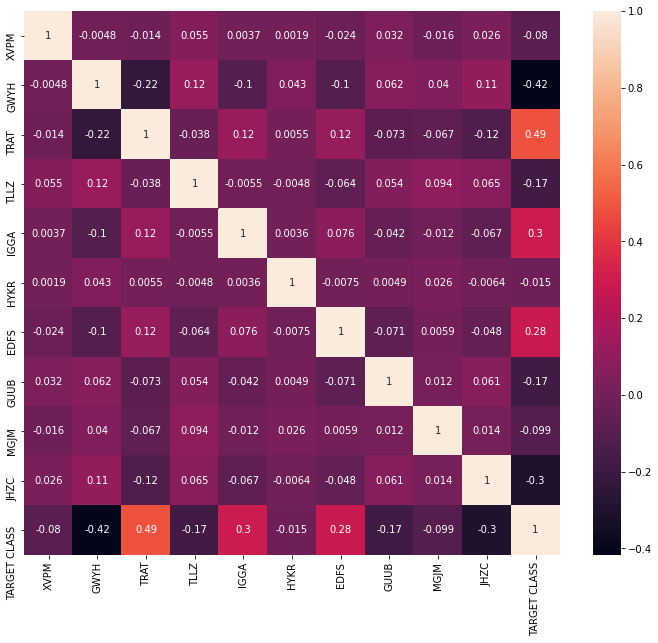

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

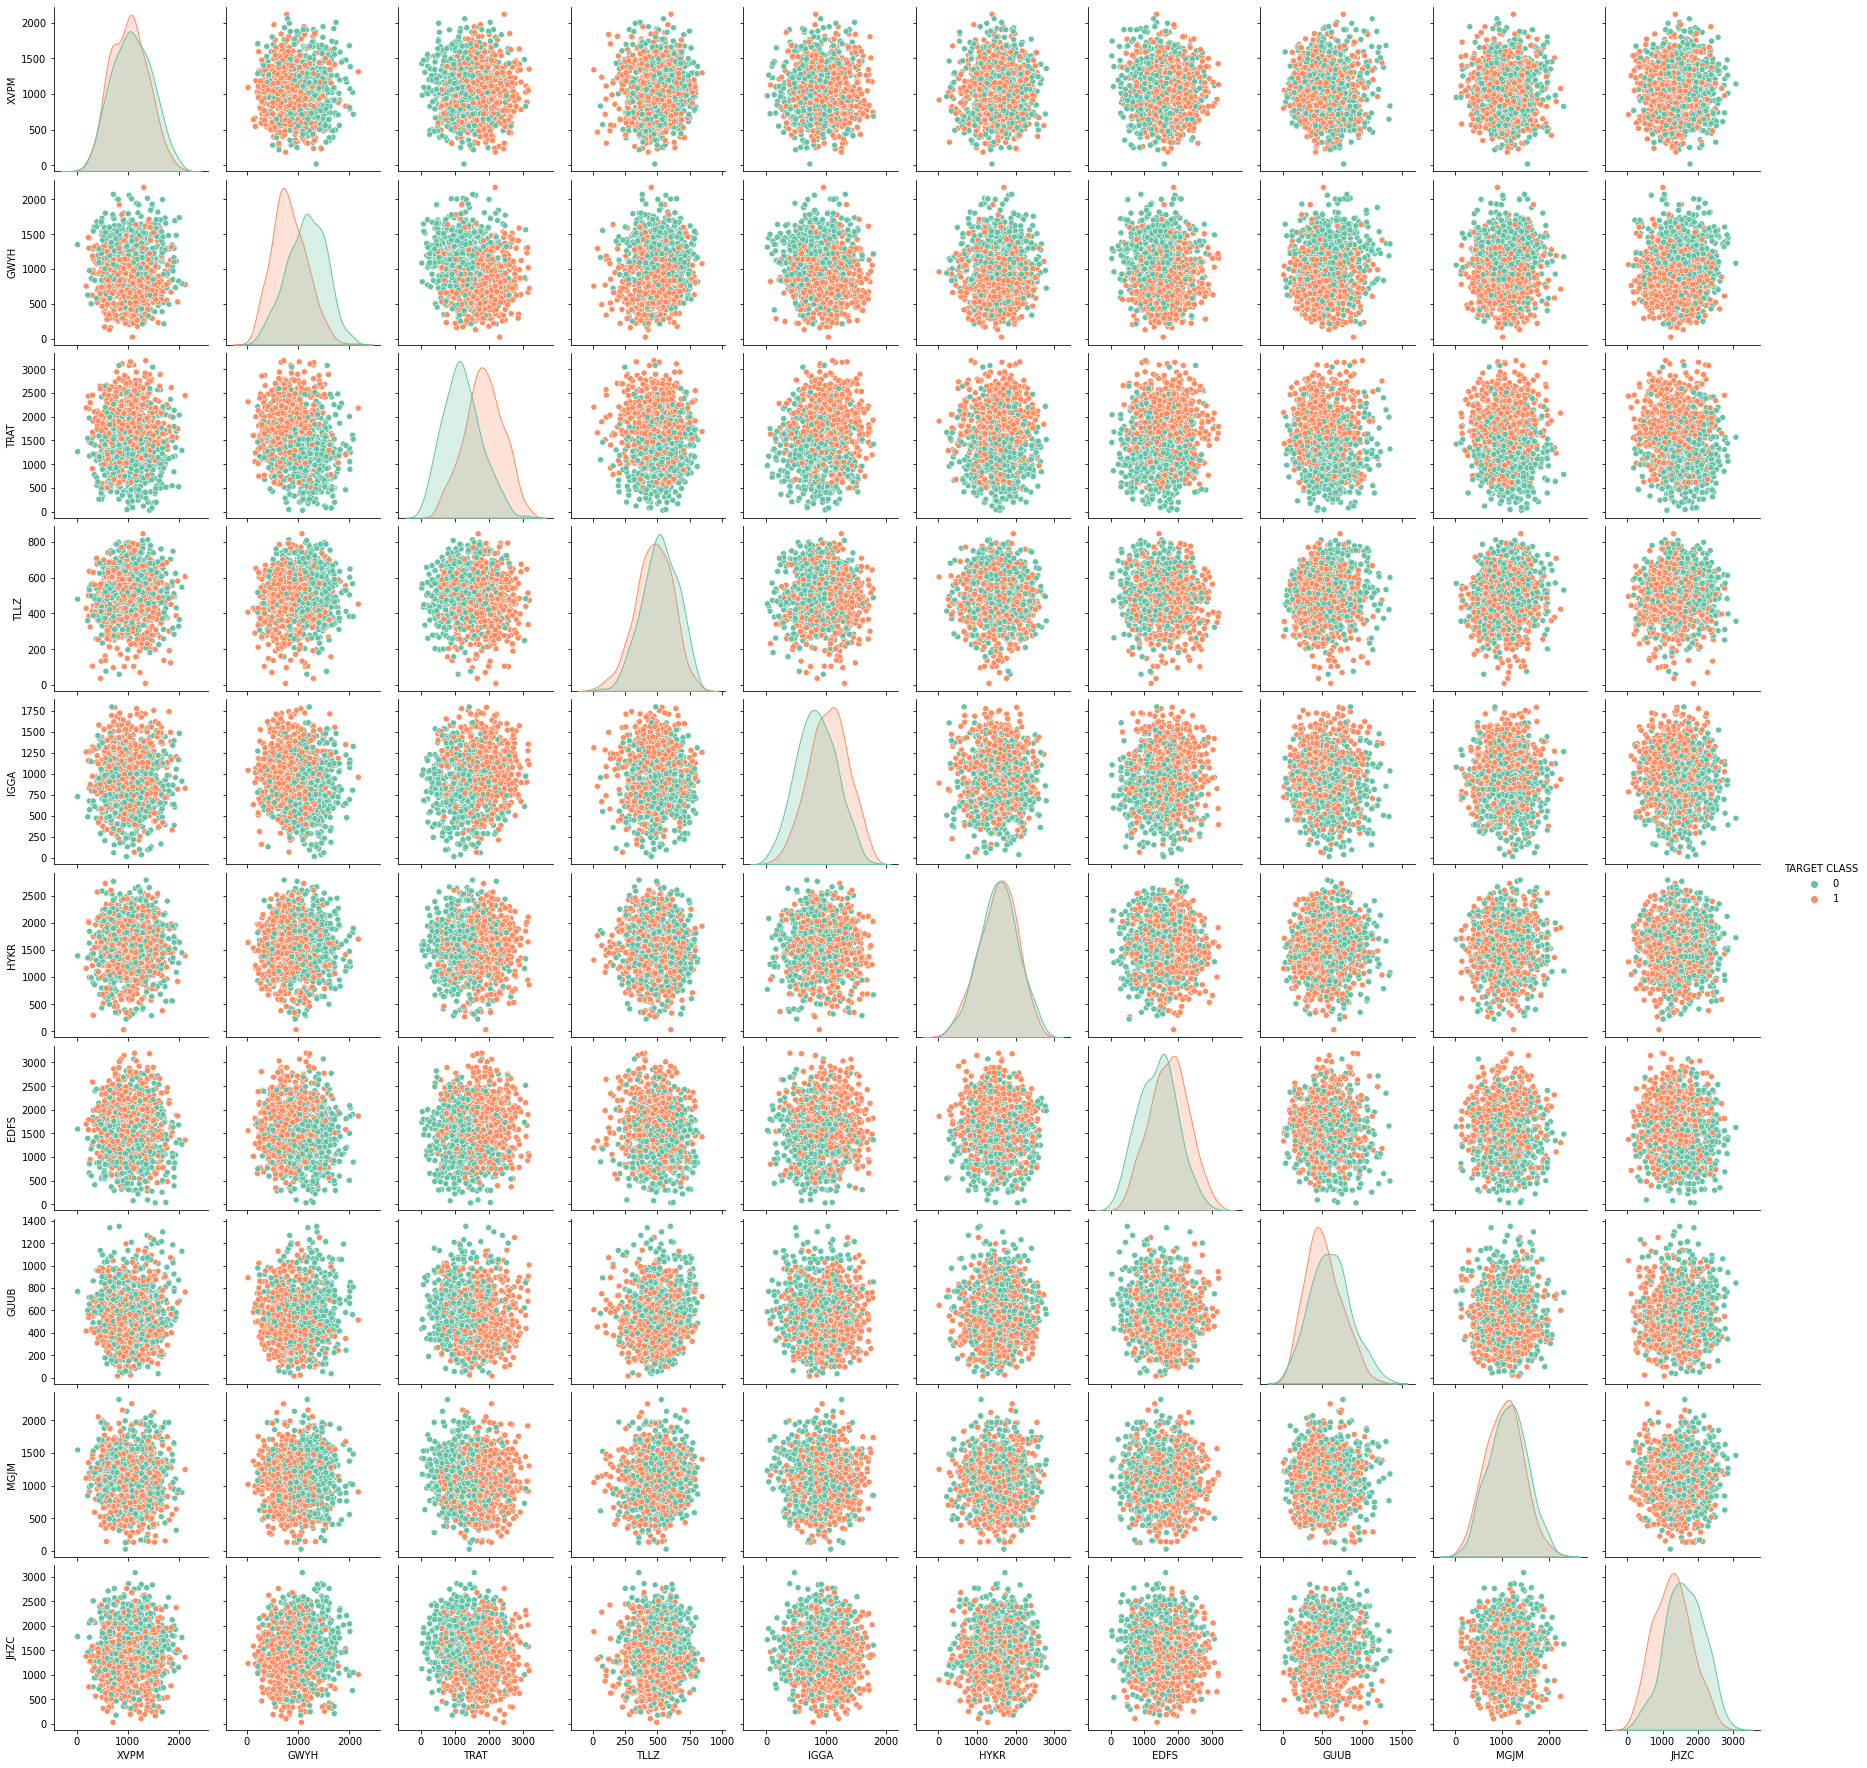

In [5]:
sns.pairplot(df, hue='TARGET CLASS', palette='Set2')

# Standardize the Variables

Time to standardize the independent variables.

You can read about StandardScaler [here](https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832)

In [8]:
from sklearn.preprocessing import StandardScaler

**Create an object of StandardScaler**

In [9]:
scaler = StandardScaler()

**Fit the object only to the independent variables.**

In [11]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

**Use the .transform() method to transform the independent variables to a scaled version.**

In [13]:
scaledFeatures = scaler.transform(df.drop('TARGET CLASS', axis=1))
scaledFeatures

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [14]:
df.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

In [15]:
scaledDf = pd.DataFrame(scaledFeatures, columns = df.columns[:-1])

In [16]:
scaledDf.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaledDf, df['TARGET CLASS'], 
                                                   test_size=0.3, random_state=101)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [19]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [23]:
predictions = knn.predict(X_test)

**Create a confusion matrix and classification report.**

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
confusion_matrix(y_test, predictions)

array([[109,  43],
       [ 41, 107]])

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K Value

**Create a for loop that trains various KNN models with different k values, then keep track of the accuracy for each of these models with a list. Refer to the diabetes prediction KNN section if you are confused.**

In [27]:
from sklearn.model_selection import cross_val_score

In [32]:
testNeighbors = list(range(1,40,2))
testNeighbors

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [28]:
cvScores = []

for i in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, scaledDf, df['TARGET CLASS'], cv=5, scoring='accuracy').mean()
    cvScores.append(score)

In [29]:
cvScores

[0.743,
 0.779,
 0.796,
 0.8109999999999999,
 0.8130000000000001,
 0.8109999999999999,
 0.8099999999999999,
 0.813,
 0.8230000000000001,
 0.8230000000000001,
 0.8240000000000001,
 0.8220000000000001,
 0.819,
 0.8240000000000001,
 0.819,
 0.826,
 0.835,
 0.8309999999999998,
 0.8299999999999998,
 0.8309999999999998]

In [38]:
max(cvScores)

0.835

In [36]:
cvScores.index(max(cvScores))

16

In [39]:
bestK = testNeighbors[cvScores.index(max(cvScores))]

**Now check which K value returned the highest accuracy and finalise it**

In [40]:
bestK

33

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [41]:
finalKNN = KNeighborsClassifier(n_neighbors=33)

X_train, X_test, y_train, y_test = train_test_split(scaledDf, df['TARGET CLASS'], 
                                                   test_size=0.3, random_state=101)

finalKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=33)

In [42]:
finalPredictions = finalKNN.predict(X_test)

In [43]:
finalPredictions

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [44]:
confusion_matrix(y_test, finalPredictions)

array([[122,  30],
       [ 22, 126]])

In [45]:
print(classification_report(y_test, finalPredictions))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       152
           1       0.81      0.85      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

